# 과대적합과 과소적합

- 모델 성능이 검증 세트에서 최고점에 도달한 이후 감소하는 경우 과대적합으로 볼 수 있다.
- 모델을 너무 오래 훈련하면 과대적합이 되기 쉽다.
- 과대적합을 막는 방법
    - 더 많은 훈련 데이터를 사용하는 방법
    - 규제(Regularization)와 같은 기법을 사용하는 방법(모델이 저장할 수 있는 정보의 양과 종류에 제약을 가함)
- 과소적합이 발생하는 이유
    - 모델이 너무 단순한 경우
    - 규제가 너무 많은 경우
    - 충분히 오래 훈련하지 않은 경우
    
### 가중치 규제와 드롭 아웃(dropout)을 통해 IMDB 영화 리뷰 모델 성능 향상

### 중요 모듈 import

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


### IMDB 데이터셋 다운로드

- 문장을 멀팃 핫 인코딩(multi-hot encoding)하여 고의로 과대적합 발생시킨 후 해결 진행
- 멀팃 핫 인코딩(multi-hot encoding)은 정수 시퀀스를 0과 1로 이루어진 벡터로 변환

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

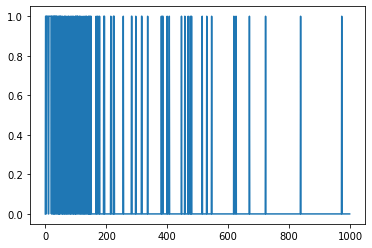

In [3]:
plt.plot(train_data[0])

### 과대적합 예제

- 과대적합을 막는 가장 단순한 방법은 모델을 축소하는 것(학습 파라미터를 줄이는 것)
- 모델의 적절한 크기나 구조는 실험을 통해서 찾는 수밖에 없다.
- 적은 수의 층과 파라미터로 시작하여 검증 손실이 감소할 때까지 새로운 층을 추가하거나 충의 크기를 늘린다.

#### 기준 모델 만들기

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

2022-02-16 16:46:08.319694: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-16 16:46:08.320639: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                16016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


#### 훈련

In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

2022-02-16 16:46:44.525859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-02-16 16:46:44.821522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 - 3s - loss: 0.5579 - accuracy: 0.7141 - binary_crossentropy: 0.5579 - val_loss: 0.4192 - val_accuracy: 0.8234 - val_binary_crossentropy: 0.4192 - 3s/epoch - 60ms/step


2022-02-16 16:46:47.328730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
49/49 - 0s - loss: 0.3598 - accuracy: 0.8492 - binary_crossentropy: 0.3598 - val_loss: 0.3455 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3455 - 350ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3185 - accuracy: 0.8677 - binary_crossentropy: 0.3185 - val_loss: 0.3303 - val_accuracy: 0.8605 - val_binary_crossentropy: 0.3303 - 350ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3043 - accuracy: 0.8746 - binary_crossentropy: 0.3043 - val_loss: 0.3285 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3285 - 377ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3022 - accuracy: 0.8752 - binary_crossentropy: 0.3022 - val_loss: 0.3286 - val_accuracy: 0.8603 - val_binary_crossentropy: 0.3286 - 354ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.2938 - accuracy: 0.8797 - binary_crossentropy: 0.2938 - val_loss: 0.3293 - val_accuracy: 0.8597 - val_binary_crossentropy: 0.3293 - 357ms/epoch - 7ms/step
Epoch 7/20
49/49 - 0s - loss: 0.2902 - accuracy: 0.8800 - binary_

#### 작은 모델 만들기

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 4004      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20


2022-02-16 16:49:22.402846: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 - 1s - loss: 0.6380 - accuracy: 0.6622 - binary_crossentropy: 0.6380 - val_loss: 0.5566 - val_accuracy: 0.7825 - val_binary_crossentropy: 0.5566 - 996ms/epoch - 20ms/step


2022-02-16 16:49:23.111807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
49/49 - 0s - loss: 0.4834 - accuracy: 0.8157 - binary_crossentropy: 0.4834 - val_loss: 0.4341 - val_accuracy: 0.8294 - val_binary_crossentropy: 0.4341 - 342ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3932 - accuracy: 0.8475 - binary_crossentropy: 0.3932 - val_loss: 0.3768 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.3768 - 346ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3513 - accuracy: 0.8587 - binary_crossentropy: 0.3513 - val_loss: 0.3522 - val_accuracy: 0.8532 - val_binary_crossentropy: 0.3522 - 342ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3310 - accuracy: 0.8654 - binary_crossentropy: 0.3310 - val_loss: 0.3400 - val_accuracy: 0.8565 - val_binary_crossentropy: 0.3400 - 365ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3180 - accuracy: 0.8698 - binary_crossentropy: 0.3180 - val_loss: 0.3337 - val_accuracy: 0.8583 - val_binary_crossentropy: 0.3337 - 374ms/epoch - 8ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3107 - accuracy: 0.8730 - binary_

#### 큰 모델 만들기

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               512512    
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dense_8 (Dense)             (None, 1)                 513       
                                                                 
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20


2022-02-16 16:50:22.236683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-16 16:50:23.006449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 - 1s - loss: 0.4582 - accuracy: 0.7766 - binary_crossentropy: 0.4582 - val_loss: 0.3320 - val_accuracy: 0.8575 - val_binary_crossentropy: 0.3320 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.2967 - accuracy: 0.8783 - binary_crossentropy: 0.2967 - val_loss: 0.3290 - val_accuracy: 0.8567 - val_binary_crossentropy: 0.3290 - 447ms/epoch - 9ms/step
Epoch 3/20
49/49 - 0s - loss: 0.2350 - accuracy: 0.9045 - binary_crossentropy: 0.2350 - val_loss: 0.3337 - val_accuracy: 0.8564 - val_binary_crossentropy: 0.3337 - 451ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.1216 - accuracy: 0.9613 - binary_crossentropy: 0.1216 - val_loss: 0.3974 - val_accuracy: 0.8477 - val_binary_crossentropy: 0.3974 - 452ms/epoch - 9ms/step
Epoch 5/20
49/49 - 0s - loss: 0.0294 - accuracy: 0.9947 - binary_crossentropy: 0.0294 - val_loss: 0.5020 - val_accuracy: 0.8463 - val_binary_crossentropy: 0.5020 - 463ms/epoch - 9ms/step
Epoch 6/20
49/49 - 0s - loss: 0.0055 - accuracy: 0.9998 - binary_crossentropy:

#### 훈련 손실과 검증 손실 그래프 그리기

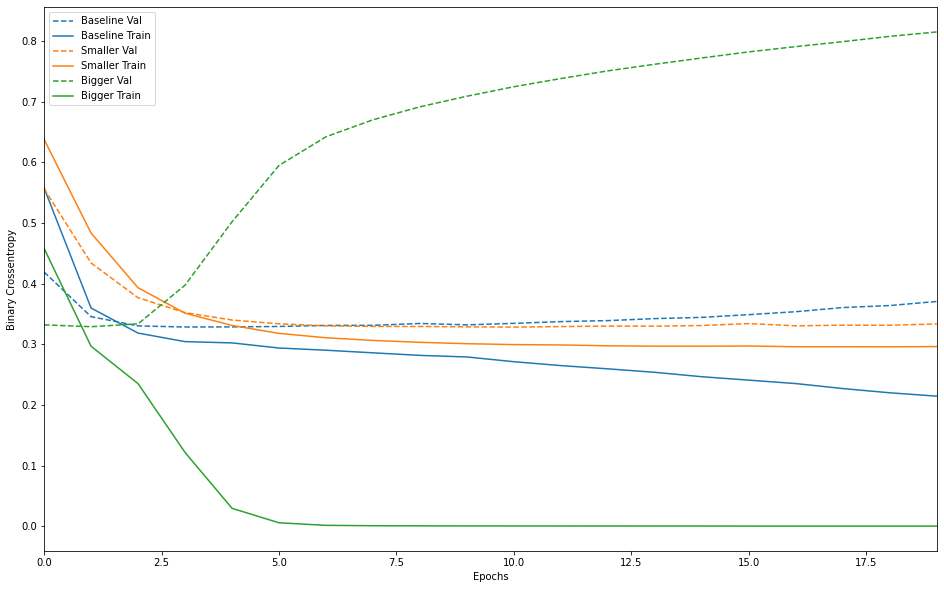

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

---

### 과대적합을 방지하기 위한 전략

#### 가중치를 규제하기
- 간단한 모델은 복잡한 모델보다 과대적합 되는 경향이 낮다(오캅의 면도날)
- **가중치 규제(weight regularization)**
    - 가중치가 작은 값을 갖도록 네트워크 복잡도에 제약을 가해 가중치 값을 균일하게 만들어준다.
    - 네트워크의 손실 함수에 큰 가중치에 해당하는 비용을 추가한다.
    - **L1 규제**: 
        - 가중치의 절댓값에 비례하는 비용이 추가(즉, 가중치의 "L1 노름(norm)"을 추가)
        - 일부 가중치를 0으로 만드는 경우가 생긴다.
    - **L2 규제**: 
        - 가중치의 제곱에 비례하는 비용이 추가(즉, 가중치의 "L2 노름"의 제곱을 추가)
        - 신경망에서는 가중치 감쇠(weight decay)라고도 부른다.
        - 가중치가 0이 되는 경우는 없다.(많이 사용하는 이유)
- 이런 규제는 휸련 시에만 주어진다.
        
> l2(0.001)는 네트워크의 전체 손실에 층에 있는 가중치 행렬의 모든 값이 0.001 * weight_coefficient_value**2만큼 더해진다는 의미

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20


2022-02-16 17:02:23.770072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-16 17:02:24.528232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 - 1s - loss: 0.5972 - accuracy: 0.7176 - binary_crossentropy: 0.5536 - val_loss: 0.4636 - val_accuracy: 0.8218 - val_binary_crossentropy: 0.4218 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4045 - accuracy: 0.8483 - binary_crossentropy: 0.3628 - val_loss: 0.3858 - val_accuracy: 0.8554 - val_binary_crossentropy: 0.3444 - 366ms/epoch - 7ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3607 - accuracy: 0.8660 - binary_crossentropy: 0.3199 - val_loss: 0.3703 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3302 - 368ms/epoch - 8ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3490 - accuracy: 0.8724 - binary_crossentropy: 0.3096 - val_loss: 0.3730 - val_accuracy: 0.8580 - val_binary_crossentropy: 0.3345 - 366ms/epoch - 7ms/step
Epoch 5/20
49/49 - 0s - loss: 0.3436 - accuracy: 0.8747 - binary_crossentropy: 0.3058 - val_loss: 0.3647 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3277 - 367ms/epoch - 7ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3382 - accuracy: 0.8756 - binary_crossentropy:

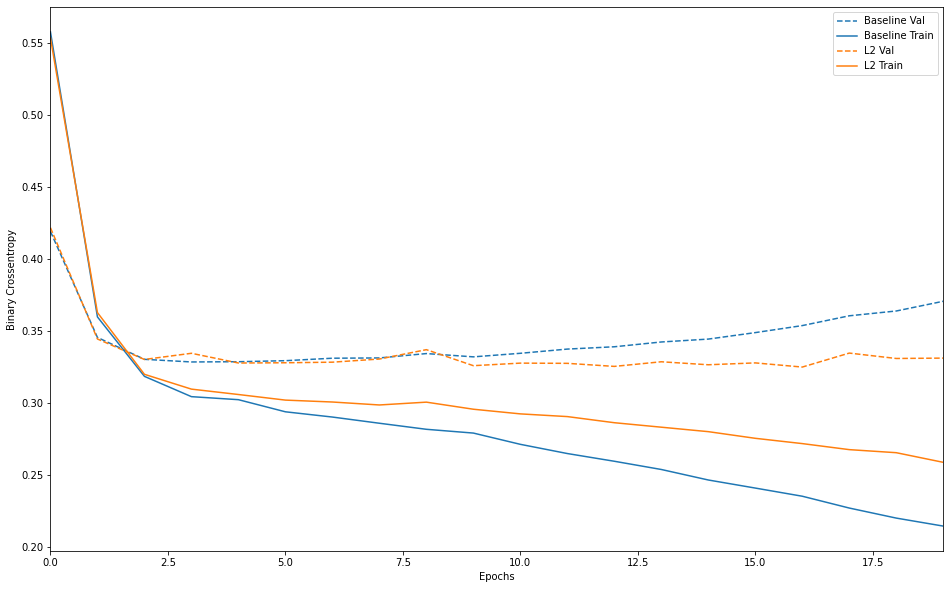

In [ ]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

#### 드롭아웃 추가하기

- 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나
- 드롭아웃을 층에 적용하면 훈련하는 동안 층의 출력 특성을 랜덤하게 끈다.
- "드롭아웃 비율"은 0이 되는 특성의 비율로 보통 0.2에서 0.5 사이를 사용
- 테스트 단계에서는 어떤 유닛도 드롭아웃하지 않고, 훈련 단계보다 더 많은 유닛이 활성화되기 때문에 균형을 맞추기 위해 층의 출력 값을 드롭아웃 비율만큼 줄인다.

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20


2022-02-16 17:08:16.176677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-16 17:08:16.971556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


49/49 - 1s - loss: 0.6754 - accuracy: 0.5668 - binary_crossentropy: 0.6754 - val_loss: 0.6073 - val_accuracy: 0.7556 - val_binary_crossentropy: 0.6073 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.5809 - accuracy: 0.6927 - binary_crossentropy: 0.5809 - val_loss: 0.4830 - val_accuracy: 0.8256 - val_binary_crossentropy: 0.4830 - 395ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5046 - accuracy: 0.7648 - binary_crossentropy: 0.5046 - val_loss: 0.4086 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.4086 - 425ms/epoch - 9ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4542 - accuracy: 0.7994 - binary_crossentropy: 0.4542 - val_loss: 0.3610 - val_accuracy: 0.8526 - val_binary_crossentropy: 0.3610 - 387ms/epoch - 8ms/step
Epoch 5/20
49/49 - 0s - loss: 0.4217 - accuracy: 0.8217 - binary_crossentropy: 0.4217 - val_loss: 0.3435 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3435 - 382ms/epoch - 8ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3939 - accuracy: 0.8314 - binary_crossentropy:

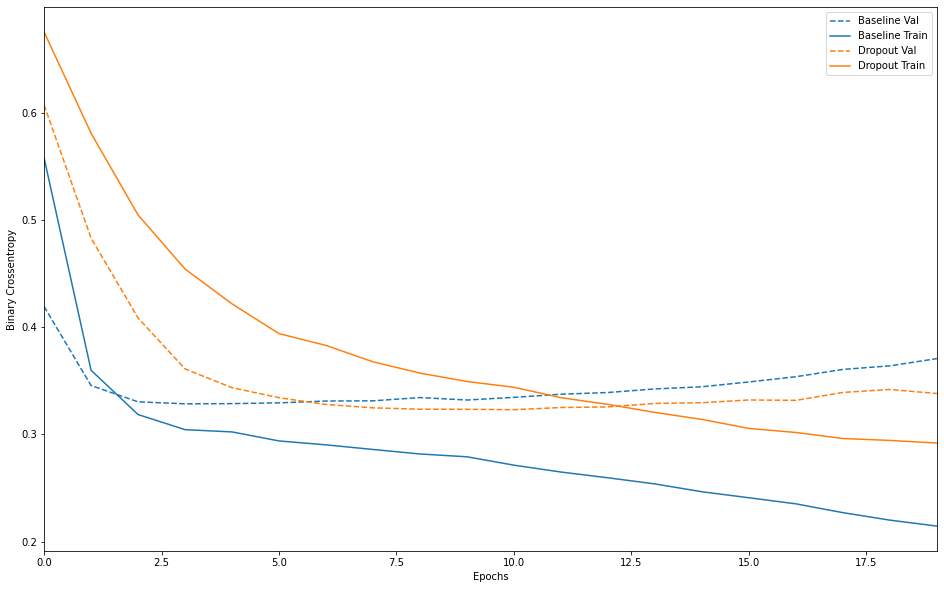

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])

### 정리

#### 과대적합을 막기 위해서는

- 더 많은 훈련 데이터를 모읍니다.
- 네트워크의 용량을 줄입니다.
- 가중치 규제를 추가합니다.
- 드롭아웃을 추가합니다.